In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z


In [2]:
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!unzip -o /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 80 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C,Utf16=off,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/mercari-price-suggestion-challenge                                                          1 file, 77912192 bytes (75 MiB)

Extracting archive: /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
--
Path = /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      3% - train.t                7% - train.t               11% - train.t               14% - train.t               18% - train.t               22% - train.t 

In [3]:
train_df = pd.read_csv('/kaggle/working/train.tsv', sep='\t')
test_df = pd.read_csv('/kaggle/working/test_stg2.tsv', sep='\t')

In [4]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [6]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460725 entries, 0 to 3460724
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   test_id            int64 
 1   name               object
 2   item_condition_id  int64 
 3   category_name      object
 4   brand_name         object
 5   shipping           int64 
 6   item_description   object
dtypes: int64(3), object(4)
memory usage: 184.8+ MB


In [8]:
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [9]:
test_df.describe()

,test_id,item_condition_id,shipping
count,3.460725e+06,3.460725e+06,3.460725e+06
mean,1.730362e+06,1.907012e+00,4.477068e-01
std,9.990254e+05,9.036678e-01,4.972580e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.651810e+05,1.000000e+00,0.000000e+00
50%,1.730362e+06,2.000000e+00,0.000000e+00
75%,2.595543e+06,3.000000e+00,1.000000e+00
max,3.460724e+06,5.000000e+00,1.000000e+00


In [10]:
test_df.duplicated().sum()

0

In [11]:
train_df.duplicated().sum()

0

In [12]:
train_df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

In [13]:
test_df.isnull().sum()

test_id                    0
name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description          10
dtype: int64

In [14]:
def split(category_name):
    try:
        return category_name.split('/')
    except AttributeError:
        return ['Null', 'Null', 'Null']
    except IndexError:
        return ['Null', 'Null', 'Null']

category_1 = []
category_2 = []
category_3 = []

for i in range(train_df.shape[0]):
    temp = split(train_df['category_name'].iloc[i])  # train_df['category_name'][i] 대신 train_df['category_name'].iloc[i] 사용
    category_1.append(temp[0])
    category_2.append(temp[1])
    category_3.append(temp[2])

train_df['category_1'] = category_1
train_df['category_2'] = category_2
train_df['category_3'] = category_3

print('1st Category:', train_df['category_1'].value_counts())
print('2nd Category:', train_df['category_2'].nunique())
print('3rd Category:', train_df['category_3'].nunique())

1st Category: category_1
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Null                        6327
Name: count, dtype: int64
2nd Category: 114
3rd Category: 871


In [15]:
pd.DataFrame(train_df[train_df['brand_name'].isnull()])

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll
...,...,...,...,...,...,...,...,...,...,...,...
1482526,1482526,Harry Potter Shirt! Women M/ Girl XL,2,Women/Tops & Blouses/T-Shirts,NaN,12.0,0,"Great Harry Potter Shirt! ""Hogwarts, School of...",Women,Tops & Blouses,T-Shirts
1482527,1482527,Blk/white ribbed mock neck bodysuit M,1,Women/Tops & Blouses/Blouse,NaN,10.0,1,Brand new black and white ribbed mock neck bod...,Women,Tops & Blouses,Blouse
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [16]:
train_df['brand_name'] = train_df['brand_name'].fillna(value='Unknown')
train_df['category_name'] = train_df['category_name'].fillna(value='Unknown')
train_df['item_description'] = train_df['item_description'].fillna(value='Unknown')

In [17]:
train_df.isna().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
category_1           0
category_2           0
category_3           0
dtype: int64

In [18]:
test_df['brand_name'] = test_df['brand_name'].fillna(value='Unknown')
test_df['category_name'] = test_df['category_name'].fillna(value='Unknown')
test_df['item_description'] = test_df['item_description'].fillna(value='Unknown')

In [19]:
test_df.isna().sum()

test_id              0
name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
dtype: int64

In [20]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,Unknown,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,Unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [21]:
train_df['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [22]:
pd.DataFrame(train_df[train_df['price'] == 0]).head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
1325,1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,Unknown,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...,Sports & Outdoors,Fan Shop,NCAA
2544,2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...,Women,Jeans,"Slim, Skinny"
2712,2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,Unknown,0.0,0,"Very simple but cute, a little form fitting as...",Women,Underwear,G-Strings & Thongs
3576,3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,Unknown,0.0,1,1 left!,Beauty,Tools & Accessories,Makeup Brushes & Tools
3761,3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,Unknown,0.0,1,5 pair gap jean excellent used condition 3 chi...,Kids,Girls (4+),Tops & T-Shirts
5237,5237,Nursing Bra,3,Women/Underwear/Bras,Motherhood Maternity,0.0,0,Used a few times but was not able to nurse,Women,Underwear,Bras
6175,6175,"Multi Listing Bundled Package, Thanks",2,Electronics/Media/DVD,Unknown,0.0,1,1)Large Collection of Full Length Strawberry S...,Electronics,Media,DVD
7116,7116,Nike Dri-Fit High Power Speed Tights,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Nike,0.0,1,"Bought at Nike store in New York, Brand New, N...",Women,Athletic Apparel,"Pants, Tights, Leggings"
7622,7622,Hands free earpiece,1,Electronics/Cell Phones & Accessories/Headsets,Unknown,0.0,0,Wireless Bluetooth hands free used with Samsun...,Electronics,Cell Phones & Accessories,Headsets
10812,10812,Vampire candy bowl,1,Home/Seasonal Décor/Halloween,Unknown,0.0,0,New good condition for halloween,Home,Seasonal Décor,Halloween


In [23]:
train_df.sort_values(by='price', ascending=False)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ...",Women,Women's Handbags,Shoulder Bag
1262245,1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...,Women,Women's Handbags,Messenger & Crossbody
1393600,1393600,David Yurman Wheaton ring,2,Women/Jewelry/Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...,Women,Jewelry,Rings
956343,956343,Chanel Black wallet on chain,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...,Women,Women's Handbags,Messenger & Crossbody
778940,778940,Mary kay,1,Beauty/Makeup/Face,Mary Kay,2000.0,1,30 time wise sets Oily to combo skin,Beauty,Makeup,Face
...,...,...,...,...,...,...,...,...,...,...,...
1207861,1207861,rue21 Eco Revert Perfume,2,Beauty/Fragrance/Women,Rue21,0.0,0,This perfume was given as a gift but I don't u...,Beauty,Fragrance,Women
503127,503127,Wardrobe Bag,1,Home/Storage & Organization/Clothing & Closet ...,Unknown,0.0,0,"Stores 15-20 dresses,Suits, Coats and long Gar...",Home,Storage & Organization,Clothing & Closet Storage
402052,402052,Small dress,2,"Women/Dresses/Above Knee, Mini",Unknown,0.0,0,Very cute size small- red and cream dress.,Women,Dresses,"Above Knee, Mini"
404685,404685,M Randy Lularoe,2,Women/Tops & Blouses/T-Shirts,LuLaRoe,0.0,0,"Worn once. Super cute, I just need to destash ...",Women,Tops & Blouses,T-Shirts


In [24]:
train_df[train_df['price'] != 0].sort_values(by='price', ascending=False)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ...",Women,Women's Handbags,Shoulder Bag
1262245,1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...,Women,Women's Handbags,Messenger & Crossbody
1393600,1393600,David Yurman Wheaton ring,2,Women/Jewelry/Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...,Women,Jewelry,Rings
415027,415027,Chanel Classic Jumbo Single flap bag,3,Women/Women's Handbags/Shoulder Bag,Chanel,2000.0,1,Authentic. Pre-loved in Excellent Condition. P...,Women,Women's Handbags,Shoulder Bag
956343,956343,Chanel Black wallet on chain,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...,Women,Women's Handbags,Messenger & Crossbody
...,...,...,...,...,...,...,...,...,...,...,...
1415942,1415942,Lipstick,1,Beauty/Makeup/Lips,Unknown,3.0,1,Only have the PINK one AVAILABLE! [rm]!!,Beauty,Makeup,Lips
64399,64399,Face Mask,1,Beauty/Skin Care/Face,Unknown,3.0,1,Seaweed peel off mask for all skin types! Will...,Beauty,Skin Care,Face
1261430,1261430,❤️FOR DANA,2,Men/Tops/T-shirts,Unknown,3.0,1,Men's L golds gym Las Vegas yellow shirt sleev...,Men,Tops,T-shirts
1128002,1128002,Card holder !,1,"Electronics/Cell Phones & Accessories/Cases, C...",Unknown,3.0,1,No description yet,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins"


In [25]:
train_df.sort_values(by='price', ascending=False)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ...",Women,Women's Handbags,Shoulder Bag
1262245,1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...,Women,Women's Handbags,Messenger & Crossbody
1393600,1393600,David Yurman Wheaton ring,2,Women/Jewelry/Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...,Women,Jewelry,Rings
956343,956343,Chanel Black wallet on chain,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...,Women,Women's Handbags,Messenger & Crossbody
778940,778940,Mary kay,1,Beauty/Makeup/Face,Mary Kay,2000.0,1,30 time wise sets Oily to combo skin,Beauty,Makeup,Face
...,...,...,...,...,...,...,...,...,...,...,...
1207861,1207861,rue21 Eco Revert Perfume,2,Beauty/Fragrance/Women,Rue21,0.0,0,This perfume was given as a gift but I don't u...,Beauty,Fragrance,Women
503127,503127,Wardrobe Bag,1,Home/Storage & Organization/Clothing & Closet ...,Unknown,0.0,0,"Stores 15-20 dresses,Suits, Coats and long Gar...",Home,Storage & Organization,Clothing & Closet Storage
402052,402052,Small dress,2,"Women/Dresses/Above Knee, Mini",Unknown,0.0,0,Very cute size small- red and cream dress.,Women,Dresses,"Above Knee, Mini"
404685,404685,M Randy Lularoe,2,Women/Tops & Blouses/T-Shirts,LuLaRoe,0.0,0,"Worn once. Super cute, I just need to destash ...",Women,Tops & Blouses,T-Shirts


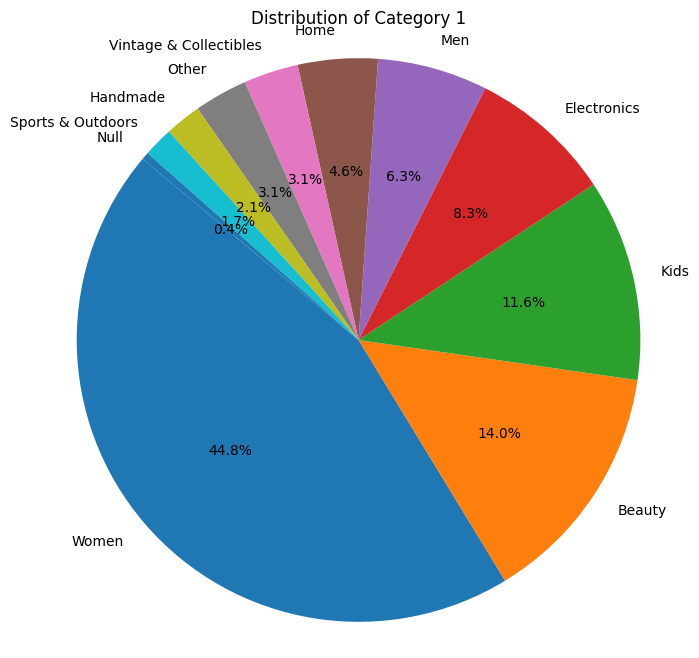

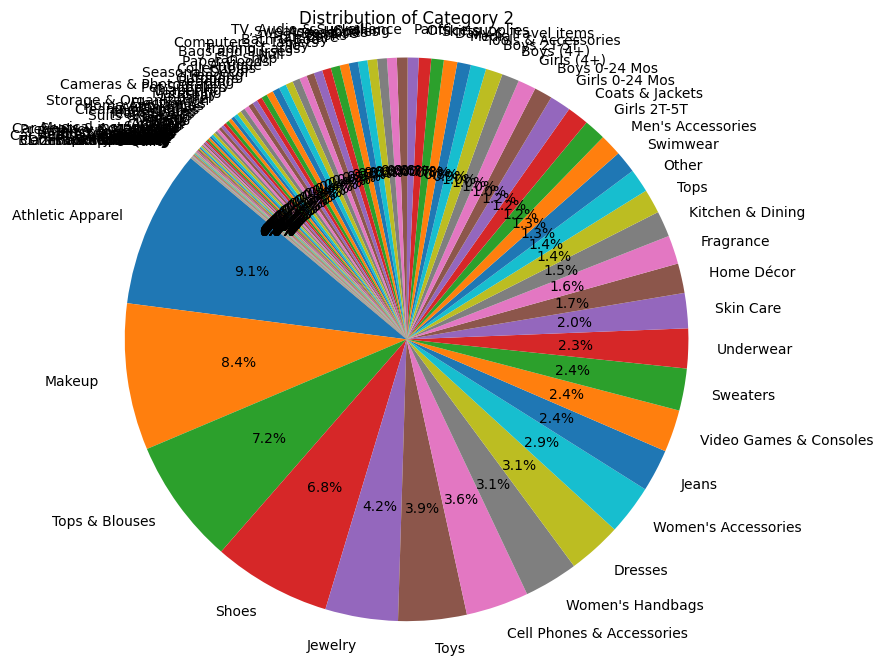

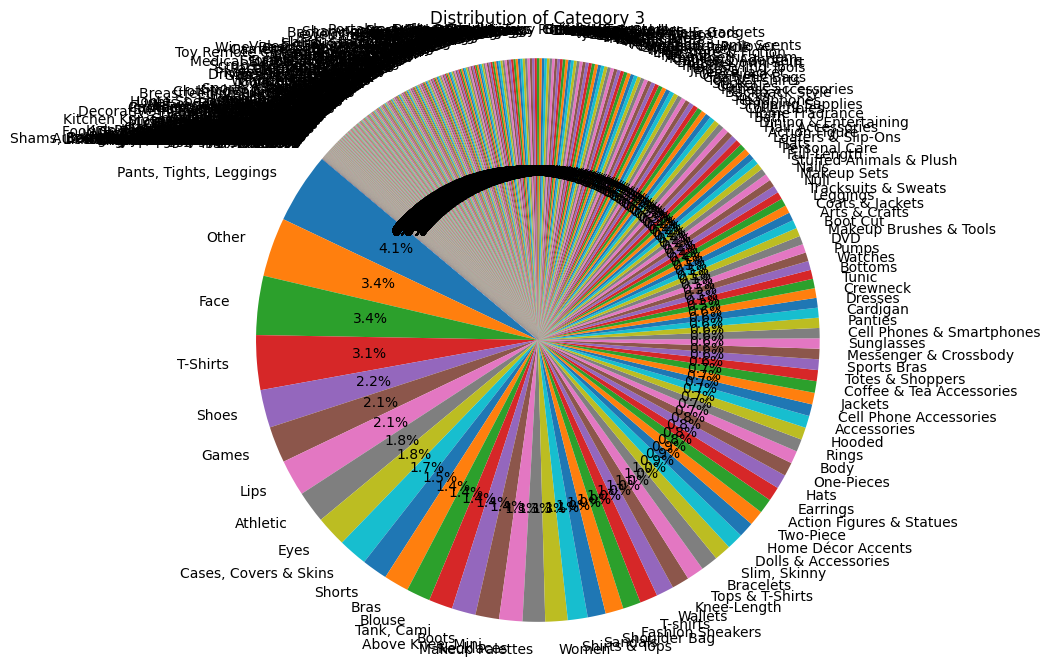

In [26]:
import matplotlib.pyplot as plt

# 카테고리 1 빈도 시각화
category_1_counts = train_df['category_1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_1_counts, labels=category_1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 1')
plt.axis('equal')  # 원형 차트를 원형으로 유지
plt.show()

# 카테고리 2 빈도 시각화
category_2_counts = train_df['category_2'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_2_counts, labels=category_2_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 2')
plt.axis('equal')
plt.show()

# 카테고리 3 빈도 시각화
category_3_counts = train_df['category_3'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_3_counts, labels=category_3_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 3')
plt.axis('equal')
plt.show()

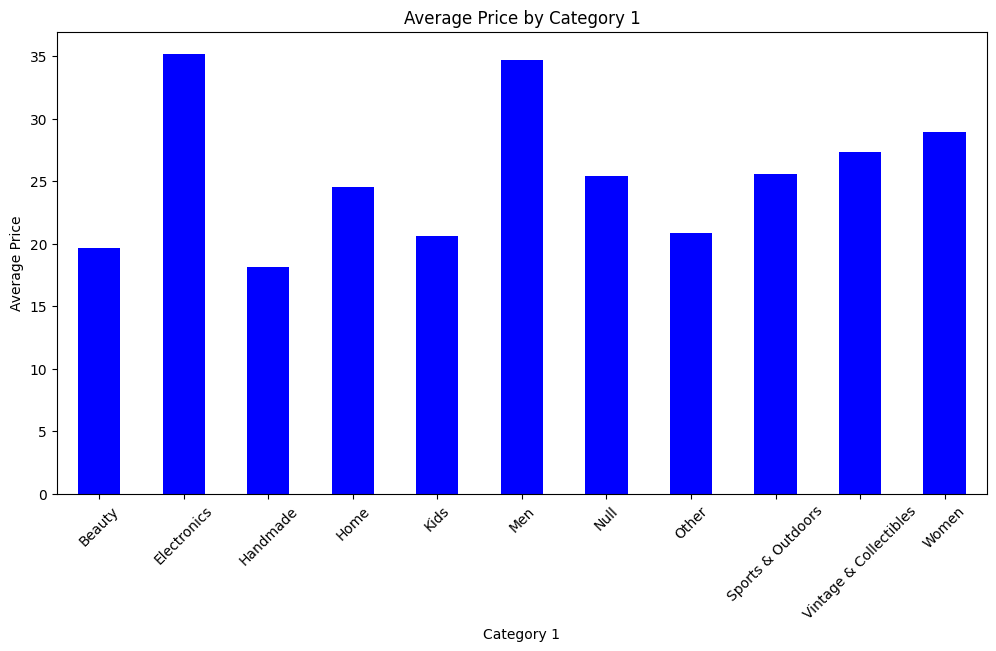

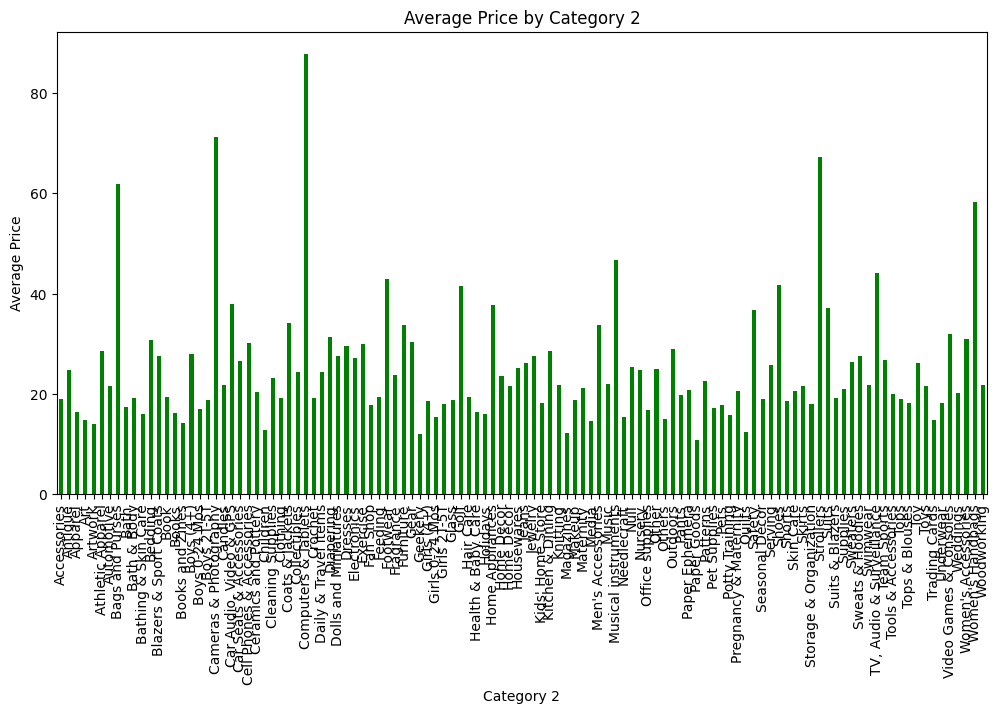

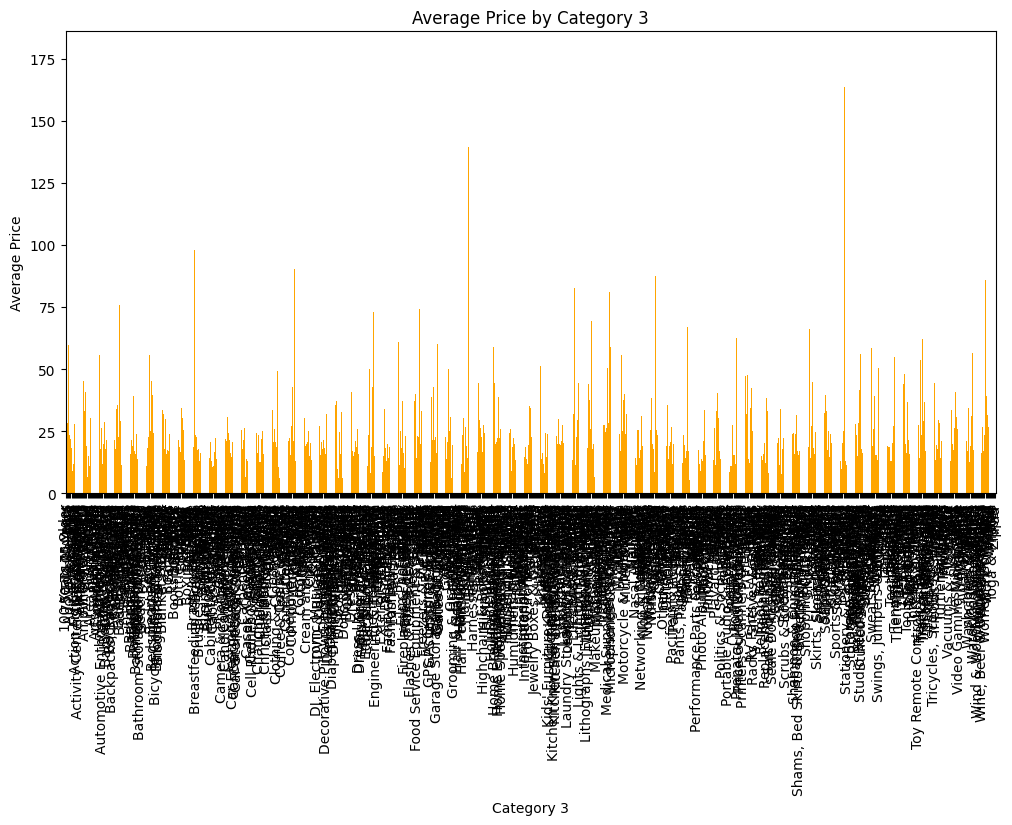

In [27]:
# 카테고리별 평균 가격 계산
category_1_avg_price = train_df.groupby('category_1')['price'].mean()
category_2_avg_price = train_df.groupby('category_2')['price'].mean()
category_3_avg_price = train_df.groupby('category_3')['price'].mean()

# 시각화 - 막대 그래프

# 카테고리 1 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_1_avg_price.plot(kind='bar', color='blue')
plt.title('Average Price by Category 1')
plt.xlabel('Category 1')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# 카테고리 2 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_2_avg_price.plot(kind='bar', color='green')
plt.title('Average Price by Category 2')
plt.xlabel('Category 2')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# 카테고리 3 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_3_avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Category 3')
plt.xlabel('Category 3')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [28]:
category_counts = train_df['category_name'].value_counts()

top_30_categories = category_counts.head(30)

print("Top 30 categories by frequency:")
print(top_30_categories)

Top 30 categories by frequency:
category_name
Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                            

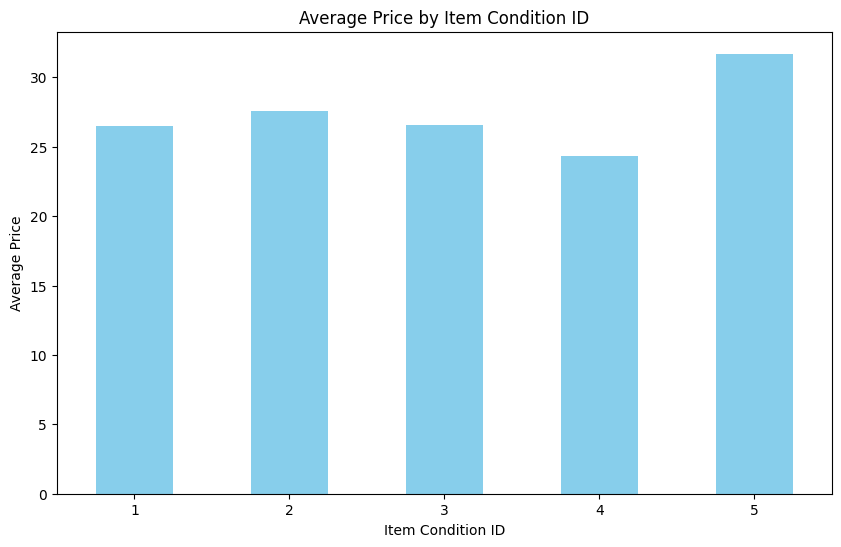

In [29]:
# item_condition_id별 평균 가격 계산
item_condition_avg_price = train_df.groupby('item_condition_id')['price'].mean()

plt.figure(figsize=(10, 6))
item_condition_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

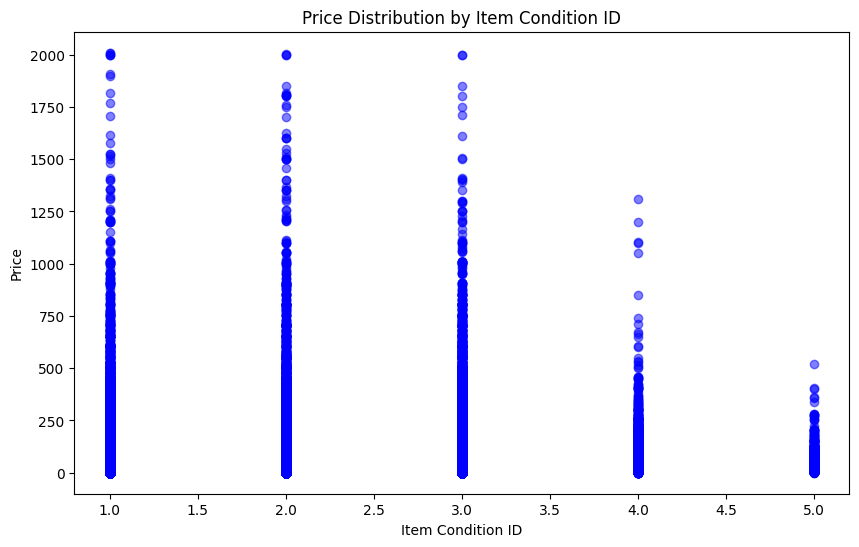

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['item_condition_id'], train_df['price'], alpha=0.5, color='blue')
plt.title('Price Distribution by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

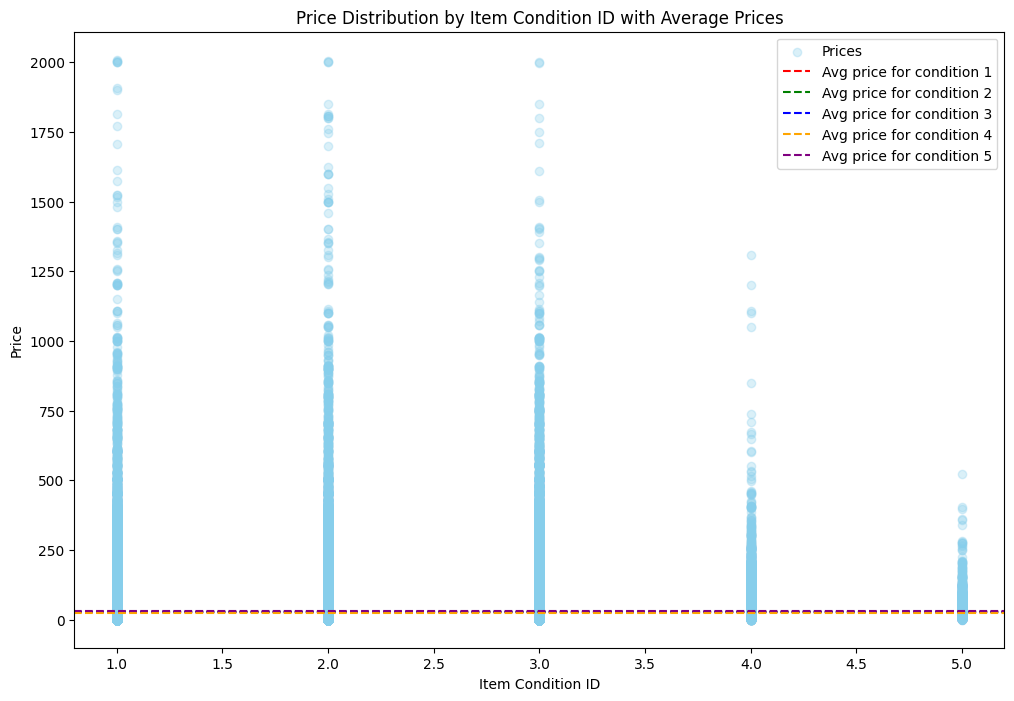

In [31]:
item_condition_avg_price = train_df.groupby('item_condition_id')['price'].mean()

plt.figure(figsize=(12, 8))
plt.scatter(train_df['item_condition_id'], train_df['price'], alpha=0.3, color='skyblue', label='Prices')

colors = ['red', 'green', 'blue', 'orange', 'purple']  # 평균 가격 라인 색상 목록
for i, (condition_id, avg_price) in enumerate(item_condition_avg_price.items()):
    plt.axhline(y=avg_price, color=colors[i % len(colors)], linestyle='--', label=f'Avg price for condition {condition_id}')

plt.title('Price Distribution by Item Condition ID with Average Prices')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
unique_conditions = train_df['item_condition_id'].unique()
print("Unique item_condition_id values:", unique_conditions)

for condition_id in unique_conditions:
    condition_df = train_df[train_df['item_condition_id'] == condition_id]
    print(f'\nStatistics for item_condition_id = {condition_id}:')
    print(condition_df['price'].describe())
    print(f'Count of item_condition_id = {condition_id}: {len(condition_df)}')

condition_counts = train_df['item_condition_id'].value_counts()
print("\nCount of each item_condition_id:")
print(condition_counts)

Unique item_condition_id values: [3 1 2 4 5]

Statistics for item_condition_id = 3:
count    432161.000000
mean         26.540711
std          40.030681
min           0.000000
25%          11.000000
50%          16.000000
75%          28.000000
max        2000.000000
Name: price, dtype: float64
Count of item_condition_id = 3: 432161

Statistics for item_condition_id = 1:
count    640549.000000
mean         26.486967
std          35.418024
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max        2009.000000
Name: price, dtype: float64
Count of item_condition_id = 1: 640549

Statistics for item_condition_id = 2:
count    375479.000000
mean         27.563225
std          42.125698
min           0.000000
25%          11.000000
50%          17.000000
75%          29.000000
max        2004.000000
Name: price, dtype: float64
Count of item_condition_id = 2: 375479

Statistics for item_condition_id = 4:
count    31962.000000
mean        24.349212
st

In [33]:
# item_description 길이 계산
train_df['description_length'] = train_df['item_description'].astype(str).apply(len)

# 상관관계 분석을 위해 필요한 열만 추출
relevant_df = train_df[['description_length', 'item_condition_id', 'price']]

# 상관관계 분석
correlation_matrix = relevant_df.corr()
print(correlation_matrix)

                    description_length  item_condition_id     price
description_length            1.000000          -0.133382  0.048049
item_condition_id            -0.133382           1.000000 -0.000807
price                         0.048049          -0.000807  1.000000


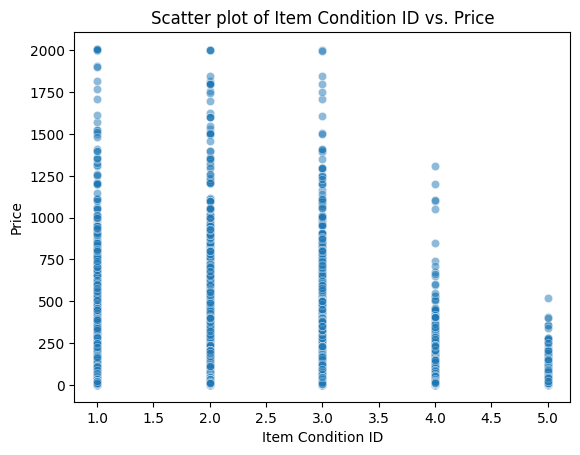

item_condition_id
1    26.486967
2    27.563225
3    26.540711
4    24.349212
5    31.703859
Name: price, dtype: float64


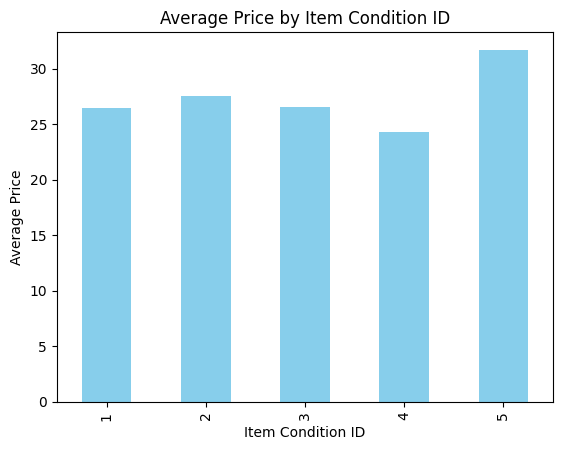

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# item_condition_id와 price 간의 상관관계 분석
sns.scatterplot(data=train_df, x='item_condition_id', y='price', alpha=0.5)
plt.title('Scatter plot of Item Condition ID vs. Price')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.show()

# item_condition_id별 평균 가격 계산
avg_price_by_condition = train_df.groupby('item_condition_id')['price'].mean()
print(avg_price_by_condition)

# item_condition_id별 평균 가격 막대 그래프
avg_price_by_condition.plot(kind='bar', color='skyblue')
plt.title('Average Price by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Average Price')
plt.show()

In [35]:
print("Correlation between description length and item condition ID:")
print(correlation_matrix.loc['description_length', 'item_condition_id'])

print("Correlation between item condition ID and price:")
print(correlation_matrix.loc['item_condition_id', 'price'])

print("Correlation between description length and price:")
print(correlation_matrix.loc['description_length', 'price'])

Correlation between description length and item condition ID:
-0.13338208122915993
Correlation between item condition ID and price:
-0.0008073728639845377
Correlation between description length and price:
0.048048838221845684


- 약한 음의 상관관계를 나타냅니다. 이는 item_description의 길이가 길수록 item_condition_id가 낮아지는 경향이 있음을 의미 / 상관계수의 절대값이 0.1 정도로 낮기 때문에, 이 관계는 매우 약한 것
-  거의 상관관계가 없음을 나타냅니다. 이는 item_condition_id와 price 간에 특별한 관계가 없음을 의미 / item_condition_id가 가격에 미치는 영향은 거의 없다
-  매우 약한 양의 상관관계를 나타냅니다. 이는 item_description의 길이가 길수록 price가 약간 증가하는 경향이 있음을 의미하지만, 상관계수의 절대값이 0.05 정도로 매우 낮기 때문에, 이 관계 역시 매우 약함

In [36]:
# name과 item_description을 합쳐서 새로운 피처 생성
train_df['combined_text'] = train_df['name'].astype(str) + ' ' + train_df['item_description'].astype(str)

In [37]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3,description_length,combined_text
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,18,MLB Cincinnati Reds T Shirt Size XL No descrip...
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,188,Razer BlackWidow Chroma Keyboard This keyboard...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,124,AVA-VIV Blouse Adorable top with a hint of lac...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,173,Leather Horse Statues New with tags. Leather h...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,41,24K GOLD plated rose Complete with certificate...


In [38]:
train_df['combined_text']

0          MLB Cincinnati Reds T Shirt Size XL No descrip...
1          Razer BlackWidow Chroma Keyboard This keyboard...
2          AVA-VIV Blouse Adorable top with a hint of lac...
3          Leather Horse Statues New with tags. Leather h...
4          24K GOLD plated rose Complete with certificate...
                                 ...                        
1482530    Free People Inspired Dress Lace, says size sma...
1482531    Little mermaid handmade dress Little mermaid h...
1482532    21 day fix containers and eating plan Used onc...
1482533    World markets lanterns There is 2 of each one ...
1482534    Brand new lux de ville wallet New with tag, re...
Name: combined_text, Length: 1482535, dtype: object

In [39]:
# import pandas as pd
# import string
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import CountVectorizer
# import time

# stop_words = set(stopwords.words('english'))

# # 텍스트 전처리 함수
# def preprocess_text(text):
#     if pd.isna(text):
#         return ''
#     # 소문자 변환
#     text = text.lower()
    
#     # 구두점 제거
#     text = text.translate(str.maketrans('', '', string.punctuation))
    
#     # 특수 문자 제거
#     text = re.sub(r'[^a-z\s]', '', text)
    
#     # 토큰화
#     words = word_tokenize(text)
    
#     # 불용어 제거
#     words = [word for word in words if word not in stop_words]
    
#     return ' '.join(words)

# # combined_text 열 생성
# train_df['combined_text'] = train_df['name'].astype(str) + ' ' + train_df['item_description'].astype(str)
# test_df['combined_text'] = test_df['name'].astype(str) + ' ' + test_df['item_description'].astype(str)

# # 전처리 및 진행도 출력
# start_time = time.time()
# print("Starting text preprocessing...")
# total_rows = len(train_df)
# for i, row in train_df.iterrows():
#     if i % 100000 == 0:  # 진행상황을 10행마다 출력
#         print(f"Processing row {i}/{total_rows}")
#     train_df.at[i, 'cleaned_text'] = preprocess_text(row['combined_text'])

# print("Text preprocessing completed in {:.2f} seconds".format(time.time() - start_time))

# # Bag of Words
# print("Starting Bag of Words vectorization...")
# start_time = time.time()
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(train_df['cleaned_text'])

# # Bag of Words 결과를 데이터프레임으로 변환
# bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# print("Bag of Words vectorization completed in {:.2f} seconds".format(time.time() - start_time))

# # 결과 출력
# print(bow_df.head())

In [40]:
# import pandas as pd
# import string
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
# import time

# # 불용어를 외부에서 불러오기
# stop_words = set(stopwords.words('english'))

# # 텍스트 전처리 함수
# def preprocess_text(text):
#     if pd.isna(text):
#         return ''
#     # 소문자 변환
#     text = text.lower()
    
#     # 구두점 제거
#     text = text.translate(str.maketrans('', '', string.punctuation))
    
#     # 특수 문자 제거
#     text = re.sub(r'[^a-z\s]', '', text)
    
#     # 토큰화
#     words = word_tokenize(text)
    
#     # 불용어 제거
#     words = [word for word in words if word not in stop_words]
    
#     return ' '.join(words)

# # combined_text 열 생성
# train_df['combined_text'] = train_df['name'].astype(str) + ' ' + train_df['item_description'].astype(str)
# test_df['combined_text'] = test_df['name'].astype(str) + ' ' + test_df['item_description'].astype(str)

# # 전처리 및 진행도 출력
# start_time = time.time()
# print("Starting text preprocessing...")

# # apply를 사용하여 전처리
# train_df['cleaned_text'] = train_df['combined_text'].apply(preprocess_text)

# print("Text preprocessing completed in {:.2f} seconds".format(time.time() - start_time))

# # TF-IDF 벡터화
# print("Starting TF-IDF vectorization...")
# start_time = time.time()
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(train_df['cleaned_text'])

# # TF-IDF 결과를 데이터프레임으로 변환
# tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# print("TF-IDF vectorization completed in {:.2f} seconds".format(time.time() - start_time))

# # 결과 출력
# print(tfidf_df.head())


In [41]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3,description_length,combined_text
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,18,MLB Cincinnati Reds T Shirt Size XL No descrip...
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,188,Razer BlackWidow Chroma Keyboard This keyboard...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,124,AVA-VIV Blouse Adorable top with a hint of lac...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,173,Leather Horse Statues New with tags. Leather h...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,41,24K GOLD plated rose Complete with certificate...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,128,"Free People Inspired Dress Lace, says size sma..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,48,Little mermaid handmade dress Little mermaid h...
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,Unknown,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,41,21 day fix containers and eating plan Used onc...
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,Unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,120,World markets lanterns There is 2 of each one ...


In [ ]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import time

# 불용어를 외부에서 불러오기
stop_words = set(stopwords.words('english'))

# 텍스트 전처리 함수
def preprocess_text(text):
    if pd.isna(text):
        return ''
    # 소문자 변환
    text = text.lower()
    
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 특수 문자 제거
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 토큰화
    words = word_tokenize(text)
    
    # 불용어 제거
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)


# 청크 단위로 데이터 나누기
chunk_size = 100000  # 한 번에 처리할 행의 수
num_chunks = len(train_df) // chunk_size + 1

# 전처리 및 벡터화 결과를 저장할 리스트
processed_chunks = []

# 전처리 및 TF-IDF 벡터화
start_time = time.time()
print("Starting text preprocessing and TF-IDF vectorization...")

for i in range(num_chunks):
    chunk = train_df[i * chunk_size:(i + 1) * chunk_size]
    chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)
    
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(chunk['cleaned_text'])
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    processed_chunks.append(tfidf_df)
    
    print(f"Processed chunk {i + 1}/{num_chunks}")

# 청크 병합
final_df = pd.concat(processed_chunks, ignore_index=True)

print("Text preprocessing and TF-IDF vectorization completed in {:.2f} seconds".format(time.time() - start_time))

# 결과 출력
print(final_df.head())

Starting text preprocessing and TF-IDF vectorization...


/tmp/ipykernel_169/2170528910.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)


Processed chunk 1/15


/tmp/ipykernel_169/2170528910.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)


Processed chunk 2/15


/tmp/ipykernel_169/2170528910.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)


Processed chunk 3/15


/tmp/ipykernel_169/2170528910.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)


Processed chunk 4/15


/tmp/ipykernel_169/2170528910.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['cleaned_text'] = chunk['combined_text'].apply(preprocess_text)
